In [ ]:
#로컬 파일을 업로드하여 표준파일에 저장
from google.colab import files
import os, shutil, re

os.makedirs("/mnt/data", exist_ok=True) # Colab 환경에 데이터 모을 표준 파일 생성
print("== 업로드 창이 뜹니다. 필요한 파일들을 한 번에 선택하세요 ==")
uploaded = files.upload()  # 파일 업로드창 생성

wanted = {
    "train_info.zip": "/mnt/data/train_info.zip",
    "val_info.tar.gz": "/mnt/data/val_info.tar.gz",
    "test_info.tar.gz": "/mnt/data/test_info.tar.gz",
    "train_lightcurves.tar.gz": "/mnt/data/train_lightcurves.tar.gz",
    "val_lightcurves.tar.gz": "/mnt/data/val_lightcurves.tar.gz",
    "test_lightcurves.tar.gz": "/mnt/data/test_lightcurves.tar.gz",
    "train_centroids.tar.gz": "/mnt/data/train_centroids.tar.gz",
    "val_centroids.tar.gz": "/mnt/data/val_centroids.tar.gz",
    "test_centroids.tar.gz": "/mnt/data/test_centroids.tar.gz",
} # 저장 경로 설정
for src in uploaded:
    if src in wanted:
        shutil.copy(src, wanted[src]) #원본 파일을 지정된 경로로 복사
        print(f"Copied exact: {src} -> {wanted[src]}")

print("\n== /mnt/data 에 있는 파일들 ==")
print(sorted(os.listdir("/mnt/data")))


== 업로드 창이 뜹니다. 필요한 파일들을 한 번에 선택하세요 ==


Saving test_centroids.tar.gz to test_centroids.tar.gz
Saving test_info.tar.gz to test_info.tar.gz
Saving test_lightcurves.tar.gz to test_lightcurves.tar.gz
Saving train_centroids.tar.gz to train_centroids.tar.gz
Saving train_info.zip to train_info.zip
Saving train_lightcurves.tar.gz to train_lightcurves.tar.gz
Saving val_centroids.tar.gz to val_centroids.tar.gz
Saving val_info.tar.gz to val_info.tar.gz
Saving val_lightcurves.tar.gz to val_lightcurves.tar.gz
Copied exact: test_centroids.tar.gz -> /mnt/data/test_centroids.tar.gz
Copied exact: test_info.tar.gz -> /mnt/data/test_info.tar.gz
Copied exact: test_lightcurves.tar.gz -> /mnt/data/test_lightcurves.tar.gz
Copied exact: train_centroids.tar.gz -> /mnt/data/train_centroids.tar.gz
Copied exact: train_info.zip -> /mnt/data/train_info.zip
Copied exact: train_lightcurves.tar.gz -> /mnt/data/train_lightcurves.tar.gz
Copied exact: val_centroids.tar.gz -> /mnt/data/val_centroids.tar.gz
Copied exact: val_info.tar.gz -> /mnt/data/val_info.tar

In [ ]:
import io, zipfile, numpy as np

path = "/mnt/data/train_info.zip"

with zipfile.ZipFile(path, "r") as z:
    # 압축 안에 있는 모든 파일 중 '_info.npy'로 끝나는 것만 선택
    info_files = [n for n in z.namelist() if n.endswith("_info.npy")]
    print(f"총 {len(info_files)}개 info 파일 중 첫 번째 파일 미리보기:")

    # 첫 번째 파일 이름
    sample_name = info_files[0]
    print("📁 파일 이름:", sample_name)

    # 내용 읽기 (디스크에 풀지 않고 바로 메모리에서 읽음)
    a = np.load(io.BytesIO(z.read(sample_name)))

    # 배열 정보 출력
    print("\n📏 shape:", a.shape)
    print("📄 dtype:", a.dtype)
    print("📊 내용 미리보기:\n", a)

총 11937개 info 파일 중 첫 번째 파일 미리보기:
📁 파일 이름: train/kplr_000757450_01_info.npy

📏 shape: (16,)
📄 dtype: float64
📊 내용 미리보기:
 [ 7.57450000e+05  1.00000000e+00  8.88492012e+00  1.34451996e+02
  8.65833312e-02  1.00000000e+00 -6.49973836e-01  3.77548160e-01
 -1.42470339e-01 -3.89418876e-02 -5.34985810e-01  4.10241228e-01
 -1.12144432e-01  1.76524268e-01 -1.90058115e+00 -4.85232446e-01]


총 11937개 stem 중 첫 번째를 미리봅니다:
📁 선택된 stem: kplr_000757450_01
 - global 파일: kplr_000757450_01_global.npy
 - local  파일: kplr_000757450_01_local.npy

📏 global shape: (2001,)  | dtype: float32
📊 global preview: [ 0.00721527 -0.00730002 -0.00437043 -0.00409406  0.00719316 -0.00246896
  0.00644878  0.00134872 -0.01265436  0.00058592]
📏 local  shape: (201,)  | dtype: float32
📊 local preview: [ 7.0335558e-03 -3.3581964e-05 -2.7201390e-03 -1.2089508e-03
 -2.5186474e-03 -3.1716301e-04  3.7313293e-04  5.3917710e-03
  8.1529543e-03  7.6007177e-03]


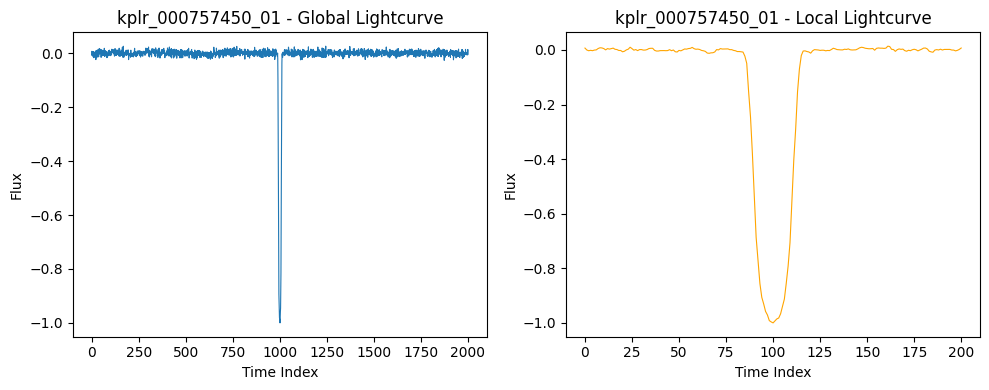

In [ ]:
import io, tarfile, os
import numpy as np
import matplotlib.pyplot as plt

path = "/mnt/data/train_lightcurves.tar.gz"

# tar.gz 열기
with tarfile.open(path, "r:gz") as tfz:
    # _global.npy / _local.npy 파일명만 추출
    members = [m for m in tfz.getmembers() if m.isfile() and m.name.endswith(".npy")]
    names = [os.path.basename(m.name) for m in members]

    # stem 목록 (중복 제거)
    stems = sorted(set(n.replace("_global.npy","").replace("_local.npy","") for n in names))
    print(f"총 {len(stems)}개 stem 중 첫 번째를 미리봅니다:")

    # 첫 번째 stem 선택
    s = stems[0]
    g_name, l_name = f"{s}_global.npy", f"{s}_local.npy"
    print("📁 선택된 stem:", s)
    print(" - global 파일:", g_name)
    print(" - local  파일:", l_name)

    # global / local 로드
    with tfz.extractfile(next(m for m in members if m.name.endswith(g_name))) as fg:
        g = np.load(io.BytesIO(fg.read()))
    with tfz.extractfile(next(m for m in members if m.name.endswith(l_name))) as fl:
        l = np.load(io.BytesIO(fl.read()))

    # 형태 및 일부 데이터 확인
    print("\n📏 global shape:", g.shape, " | dtype:", g.dtype)
    print("📊 global preview:", g[:10])
    print("📏 local  shape:", l.shape, " | dtype:", l.dtype)
    print("📊 local preview:", l[:10])

    # 간단히 시각화
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(g, linewidth=0.8)
    plt.title(f"{s} - Global Lightcurve")
    plt.xlabel("Time Index"); plt.ylabel("Flux")
    plt.subplot(1,2,2)
    plt.plot(l, linewidth=0.8, color="orange")
    plt.title(f"{s} - Local Lightcurve")
    plt.xlabel("Time Index"); plt.ylabel("Flux")
    plt.tight_layout()
    plt.show()


Shapes: 
  info: (11937, 13) (1574, 13) (1573, 13) 
  glob: (11937, 2001, 1) (1574, 2001, 1) (1573, 2001, 1) 
  loc : (11937, 201, 1) (1574, 201, 1) (1573, 201, 1)
Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 267ms/step - accuracy: 0.7324 - auc: 0.7858 - loss: 0.5844 - val_accuracy: 0.8164 - val_auc: 0.8939 - val_loss: 0.4359
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 270ms/step - accuracy: 0.8131 - auc: 0.8964 - loss: 0.4168 - val_accuracy: 0.8596 - val_auc: 0.9255 - val_loss: 0.3245
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 258ms/step - accuracy: 0.8406 - auc: 0.9200 - loss: 0.3549 - val_accuracy: 0.8545 - val_auc: 0.9422 - val_loss: 0.3403
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 250ms/step - accuracy: 0.8619 - auc: 0.9420 - loss: 0.3045 - val_accuracy: 0.8787 - val_auc: 0.9541 - val_loss: 0.2945
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 260ms/step - accuracy: 0.8769 - auc: 0.9505 - loss: 0.2813 - val_accuracy: 0.8844 - val_auc: 0.9582 - val_loss: 0.2771
Epoch 6/20
47/47 ━━━━━━━━━━━━━━

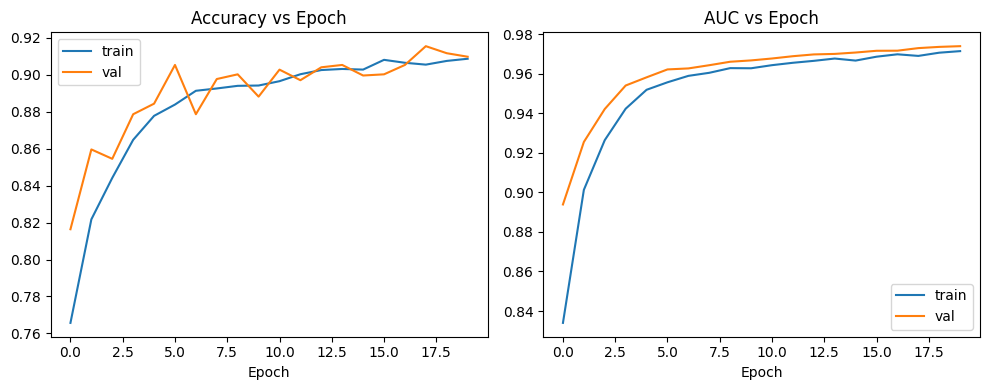

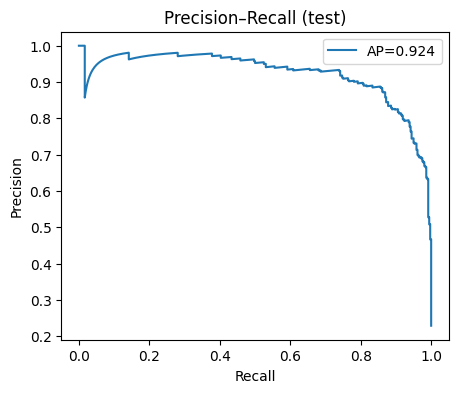

In [ ]:
# 모듈
import os, io, tarfile, zipfile, numpy as np, matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

EPOCHS = 20
BATCH_SIZE = 256
DROP_INFO_IDX = (0, 1, 5)  # 0: KIC, 1: cand no, 5: label 제외 (feature가 아닌 데이터와 label 제거)

# info 로더
def load_info_no_leak(path, drop_idx=DROP_INFO_IDX):
    X_raw, y, stems = [], [], []
    if path.endswith(".zip"):
        with zipfile.ZipFile(path, "r") as z: # 압축파일 읽기모드로 열기
            for n in z.namelist(): # 압축 안의 파일 리스트 가져옴
                if n.endswith("_info.npy"):
                    a = np.load(io.BytesIO(z.read(n))).astype(float)
                    stems.append(n.rsplit("/",1)[-1].replace("_info.npy",""))
                    y.append(int(a[5])); X_raw.append(a)
    else:
        with tarfile.open(path, "r:gz") as tfz:
            for m in tfz.getmembers():
                if m.name.endswith("_info.npy"):
                    a = np.load(io.BytesIO(tfz.extractfile(m).read())).astype(float)
                    stems.append(m.name.rsplit("/",1)[-1].replace("_info.npy",""))
                    y.append(int(a[5])); X_raw.append(a)
    X_raw = np.vstack(X_raw); y = np.array(y) #각 info 리스트를 원소로 갖는 리스트
    keep = [i for i in range(X_raw.shape[1]) if i not in set(drop_idx)]
    X = X_raw[:, keep]
    return X, y, stems

    #X: feature들 포함 행렬, y: label (0 또는 1), stems: 파일 기본 이름

# lightcurve 로더
def load_lightcurves_for_stems(stems, lc_tar_path):
    lc = {}
    with tarfile.open(lc_tar_path, "r:gz") as tfz:
        name_to_member = {os.path.basename(m.name): m for m in tfz.getmembers() if m.isfile()}
        for s in stems:
            g_name, l_name = f"{s}_global.npy", f"{s}_local.npy"
            if g_name in name_to_member and l_name in name_to_member:
                with tfz.extractfile(name_to_member[g_name]) as fg:
                    g = np.load(io.BytesIO(fg.read()))
                with tfz.extractfile(name_to_member[l_name]) as fl:
                    l = np.load(io.BytesIO(fl.read()))
                lc[s] = (g.astype(np.float32), l.astype(np.float32))
    return lc

#global & local 모두 있는 stem에 대해서 생성
#lc: {stem, (global_array, local_array)}

def build_split(info_path, lc_path):
    X_info, y, stems = load_info_no_leak(info_path)
    lc_map = load_lightcurves_for_stems(stems, lc_path)
    keep_rows, G, L = [], [], []
    for i, s in enumerate(stems):
        if s in lc_map:
            g, l = lc_map[s]
            G.append(g); L.append(l); keep_rows.append(i)
    X_info = X_info[keep_rows]; y = np.array(y)[keep_rows]
    G = np.stack(G); L = np.stack(L)

    # 표준화 (샘플별 z-score)
    def zscore_per_row(arr):
        mu = arr.mean(axis=1, keepdims=True); sd = arr.std(axis=1, keepdims=True) + 1e-8
        return (arr - mu) / sd
    G = zscore_per_row(G)[..., None]
    L = zscore_per_row(L)[..., None]
    X_info = (X_info - X_info.mean(0, keepdims=True)) / (X_info.std(0, keepdims=True) + 1e-8)
    return (X_info.astype(np.float32), G.astype(np.float32), L.astype(np.float32), y.astype(np.float32))

# 데이터 로드
Xtr_i, Xtr_g, Xtr_l, ytr = build_split("/mnt/data/train_info.zip", "/mnt/data/train_lightcurves.tar.gz")
Xva_i, Xva_g, Xva_l, yva = build_split("/mnt/data/val_info.tar.gz",   "/mnt/data/val_lightcurves.tar.gz")
Xte_i, Xte_g, Xte_l, yte = build_split("/mnt/data/test_info.tar.gz",  "/mnt/data/test_lightcurves.tar.gz")
print("Shapes:",
      "\n  info:", Xtr_i.shape, Xva_i.shape, Xte_i.shape,
      "\n  glob:", Xtr_g.shape, Xva_g.shape, Xte_g.shape,
      "\n  loc :", Xtr_l.shape, Xva_l.shape, Xte_l.shape)

# tf.data
def make_ds(Xi, Xg, Xl, y, shuffle=True):
    ds = tf.data.Dataset.from_tensor_slices(((Xi, Xg, Xl), y))
    if shuffle: ds = ds.shuffle(len(y), reshuffle_each_iteration=True)
    return ds.batch(256).prefetch(tf.data.AUTOTUNE)

ds_tr, ds_va, ds_te = make_ds(Xtr_i, Xtr_g, Xtr_l, ytr, True), make_ds(Xva_i, Xva_g, Xva_l, yva, False), make_ds(Xte_i, Xte_g, Xte_l, yte, False)

# 모델
def make_model(tg, tl, dinfo):
    #CNN 기반 (Conv1D, MaxPooling1D, GlobalAveragePooling1D)
    inp_g = keras.Input(shape=(tg,1)); xg = layers.Conv1D(16,5,padding="same",activation="relu")(inp_g)
    xg = layers.MaxPooling1D(2)(xg); xg = layers.Conv1D(32,5,padding="same",activation="relu")(xg); xg = layers.GlobalAveragePooling1D()(xg)
    inp_l = keras.Input(shape=(tl,1)); xl = layers.Conv1D(16,5,padding="same",activation="relu")(inp_l)
    xl = layers.MaxPooling1D(2)(xl); xl = layers.Conv1D(32,5,padding="same",activation="relu")(xl); xl = layers.GlobalAveragePooling1D()(xl)
    #Dense 기반
    inp_i = keras.Input(shape=(dinfo,)); xi = layers.Dense(32, activation="relu")(inp_i)

    x = layers.Concatenate()([xg, xl, xi]); x = layers.Dense(64, activation="relu")(x); x = layers.Dropout(0.3)(x)
    out = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model([inp_i, inp_g, inp_l], out)
    model.compile(optimizer=keras.optimizers.Adam(1e-3), loss="binary_crossentropy",
                  metrics=["accuracy", keras.metrics.AUC(name="auc")])
    return model

model = make_model(Xtr_g.shape[1], Xtr_l.shape[1], Xtr_i.shape[1])

# 클래스 불균형 가중치
pos, neg = float(ytr.sum()), float(len(ytr)-ytr.sum())
class_weight = {0: (pos+neg)/(2*neg+1e-8), 1: (pos+neg)/(2*pos+1e-8)}

hist = model.fit(ds_tr, validation_data=ds_va, epochs=20,
                 class_weight=class_weight,
                 callbacks=[keras.callbacks.EarlyStopping(monitor="val_auc", mode="max", patience=5, restore_best_weights=True)],
                 verbose=1)

# Epoch별 Accuracy/AUC
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(hist.history["accuracy"], label="train"); ax[0].plot(hist.history["val_accuracy"], label="val")
ax[0].set_title("Accuracy vs Epoch"); ax[0].set_xlabel("Epoch"); ax[0].legend()
ax[1].plot(hist.history["auc"], label="train"); ax[1].plot(hist.history["val_auc"], label="val")
ax[1].set_title("AUC vs Epoch"); ax[1].set_xlabel("Epoch"); ax[1].legend()
plt.tight_layout(); plt.show()

# ==== Test PR ====
y_score = model.predict(ds_te, verbose=0).ravel()
pr, rc, _ = precision_recall_curve(yte, y_score); ap = average_precision_score(yte, y_score)
plt.figure(figsize=(5,4)); plt.plot(rc, pr, label=f"AP={ap:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision–Recall (test)"); plt.legend(); plt.show()
